In [6]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas'

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker

In [8]:
df=pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


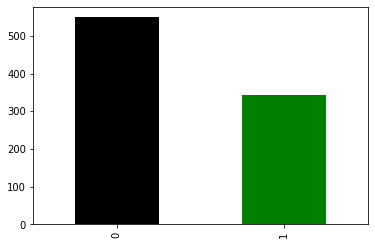

In [9]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
color=['black', 'green']
df['Survived'].value_counts().plot.bar(color=color)

In [10]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

df.groupby(['Pclass'])['Survived'].value_counts(normalize=True) * 100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [ ]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

Text(0, 0.5, 'number of people')

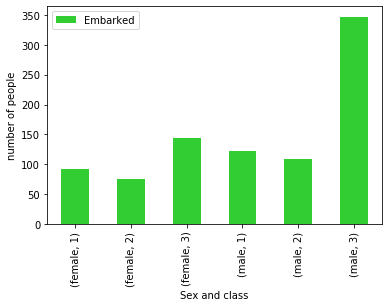

In [12]:
color=['limegreen']
df[['Embarked','Sex','Pclass']].groupby(['Sex','Pclass']).count().plot.bar(color=color)
plt.xlabel('Sex and class')
plt.ylabel('number of people')

In [89]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

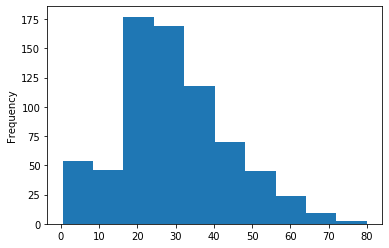

In [13]:
df['Age'].plot.hist()


Text(0.5, 1.0, 'Survived')

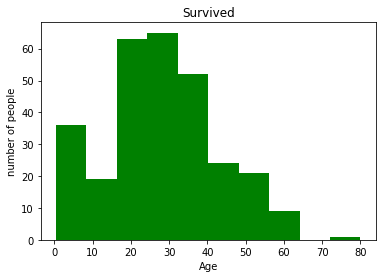

In [14]:
df_surv=df[df['Survived'] == 1]['Age'].plot.hist(color='green')
plt.xlabel('Age')
plt.ylabel('number of people')
plt.title('Survived')

Text(0.5, 1.0, 'non-surviving passengers')

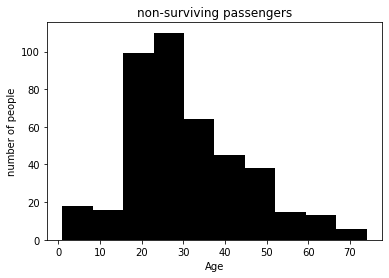

In [15]:
df_dead=df[df['Survived'] == 0]['Age'].plot.hist(color='black')
plt.xlabel('Age')
plt.ylabel('number of people')
plt.title('non-surviving passengers')

C:\Users\Kriszta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


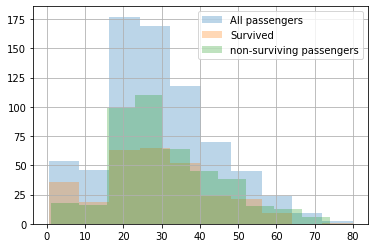

In [20]:
ax1=df['Age'].hist(alpha=0.3)
ax2=df[df['Survived'] == 1]['Age'].hist(alpha=0.3)
ax3=df[df['Survived'] == 0]['Age'].hist(alpha=0.3)
plt.legend([ax1, ax2, ax3], labels=['All passengers', 'Survived', 'non-surviving passengers'])

In [21]:
# Calculate the average age for survived and drowned passengers separately.
drowned_mean=df[df['Survived'] == 0]['Age'].mean()
drowned_mean

30.62617924528302

In [22]:
survived_mean=df[df['Survived'] == 1]['Age'].mean()
survived_mean

28.343689655172415

In [126]:
#Replace missing age values by the mean age.

In [23]:
mean_age= df['Age'].mean()
mean_age

29.69911764705882

In [24]:
df['Age'].fillna(mean_age, inplace= True)

In [ ]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [25]:
df[['Embarked','Survived','Sex','Pclass']].groupby(['Survived','Pclass','Sex']).count()

Embarked
Survived Pclass Sex             
0        1      female         3
                male          77
         2      female         6
                male          91
         3      female        72
                male         300
1        1      female        89
                male          45
         2      female        70
                male          17
         3      female        72
                male          47